## Exploratory Analysis for Wine Quality Prediction

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.base import clone
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif, SelectKBest

### Step 1: Load datasets, carry out basic statistical examination, merge and inspect data 

##### load dataset

In [2]:
white_wine = pd.read_csv('winequality-white.csv')
red_wine = pd.read_csv('winequality-red.csv')

In [3]:
print(white_wine.shape)
white_wine.head(5)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(red_wine.shape)
red_wine.head(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


Both white and red wine have the same column number and title but different total row number. The datasets will be merge into one since i am carrying out a predision on wine quality and not predicting the quality of a particular wine type. Merging the dataset into one dusing pandas concatinate funtion seems appropriate.

In [5]:
# joining dataset since they have same column header DataFrames
merged_wine = pd.concat([white_wine, red_wine], ignore_index=True)
print(merged_wine.shape)
merged_wine

(6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# using .info() to get the concise summary of the merged wine’s metadata and memory usage.
merged_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
# using .describe() method provides statistical summary of the numeric columns in merged_wine DataFrame.
merged_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The datasets have been successfully loaded and merged. The merged dataset contains **6,497 instances and 12 attributes** as expected.

#### Check for null values

In [8]:
# cheching for null values
null_check = merged_wine.isnull().sum()
null_check

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values present in wine dataset.

#### Check for duplicates

In [9]:
# Check for duplicates across all columns
duplicates = merged_wine.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool


In [10]:
# Checking for duplicates in each row
duplicates_per_row = merged_wine.duplicated()

# Counting the number of rows with duplicates
num_rows_with_duplicates = duplicates_per_row.sum()

print("Number of rows with duplicates:", num_rows_with_duplicates)

Number of rows with duplicates: 1179


In [11]:
# Drop duplicates in merged_wine
wine = merged_wine.drop_duplicates(keep='first')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
# Double Checking for duplicates in each row
duplicates_per_row = wine.duplicated()

# Count the number of rows with duplicates
num_rows_with_duplicates = duplicates_per_row.sum()

print("Number of rows with duplicates:", num_rows_with_duplicates)

Number of rows with duplicates: 0


After dropping the duplicated rows in the dataset we are left with 5,318 rows out of 6,497.

### Step 2: Outlier Detection and Treatment
The script below will calculate the number of outliers for each feature, which will help to understand which features have the most significant variations and might influence modelling. The plan is to keep these outliers for robust modelling.

In [13]:
# check for outliers
outlier_results = {}
for feature in wine.columns[:-1]:  # Excluding the target variable 'quality' because its a categorical columns
    Q1 = wine[feature].quantile(0.25)
    Q3 = wine[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wine[(wine[feature] < lower_bound) | (wine[feature] > upper_bound)]
    outlier_results[feature] = len(outliers)
outlier_results

{'fixed acidity': 304,
 'volatile acidity': 279,
 'citric acid': 143,
 'residual sugar': 141,
 'chlorides': 237,
 'free sulfur dioxide': 44,
 'total sulfur dioxide': 10,
 'density': 3,
 'pH': 49,
 'sulphates': 163,
 'alcohol': 1}

#### Interpretation of Outlier Results:
- Fixed Acidity (304 outliers): A considerable number of values fall outside the typical range, indicating variability in acidity levels across wines.
- Volatile Acidity (279 outliers): Similar to fixed acidity, there's significant variability, which could affect the aroma and taste of the wine.
- Citric Acid (143 outliers): This shows the highest number of outliers, suggesting a wide range in the composition of wines concerning this acid, which influences wine freshness.
- Residual Sugar (141 outliers): Fewer outliers compared to acidity-related features, but still notable, especially for wines differing in dryness and sweetness.
- Chlorides (237 outliers): Indicates significant variation in salt content, which can influence flavor and preservation.
- Free Sulfur Dioxide (44 outliers): Relatively fewer outliers, important for wine's microbial stability.
- Total Sulfur Dioxide (10 outliers): Very few outliers, suggesting that sulfur dioxide levels are generally consistent.
- Density (3 outliers): Almost all wines have similar densities, with very few exceptions.
- pH (49 outliers): Shows some variation, affecting the tartness and color stability of wine.
- Sulphates (163 outliers): A moderate number of outliers, indicating variance in additives that can influence flavor and preservation.
- Alcohol (1 outliers): Similar to density, most wines have consistent alcohol levels, with few exceptions.

These outlier counts shows that while some features like citric acid, volatile acidity, and fixed acidity show high variability, others like total sulfur dioxide and alcohol are more consistent across the dataset.

#### Visualising outliers with Box Plots

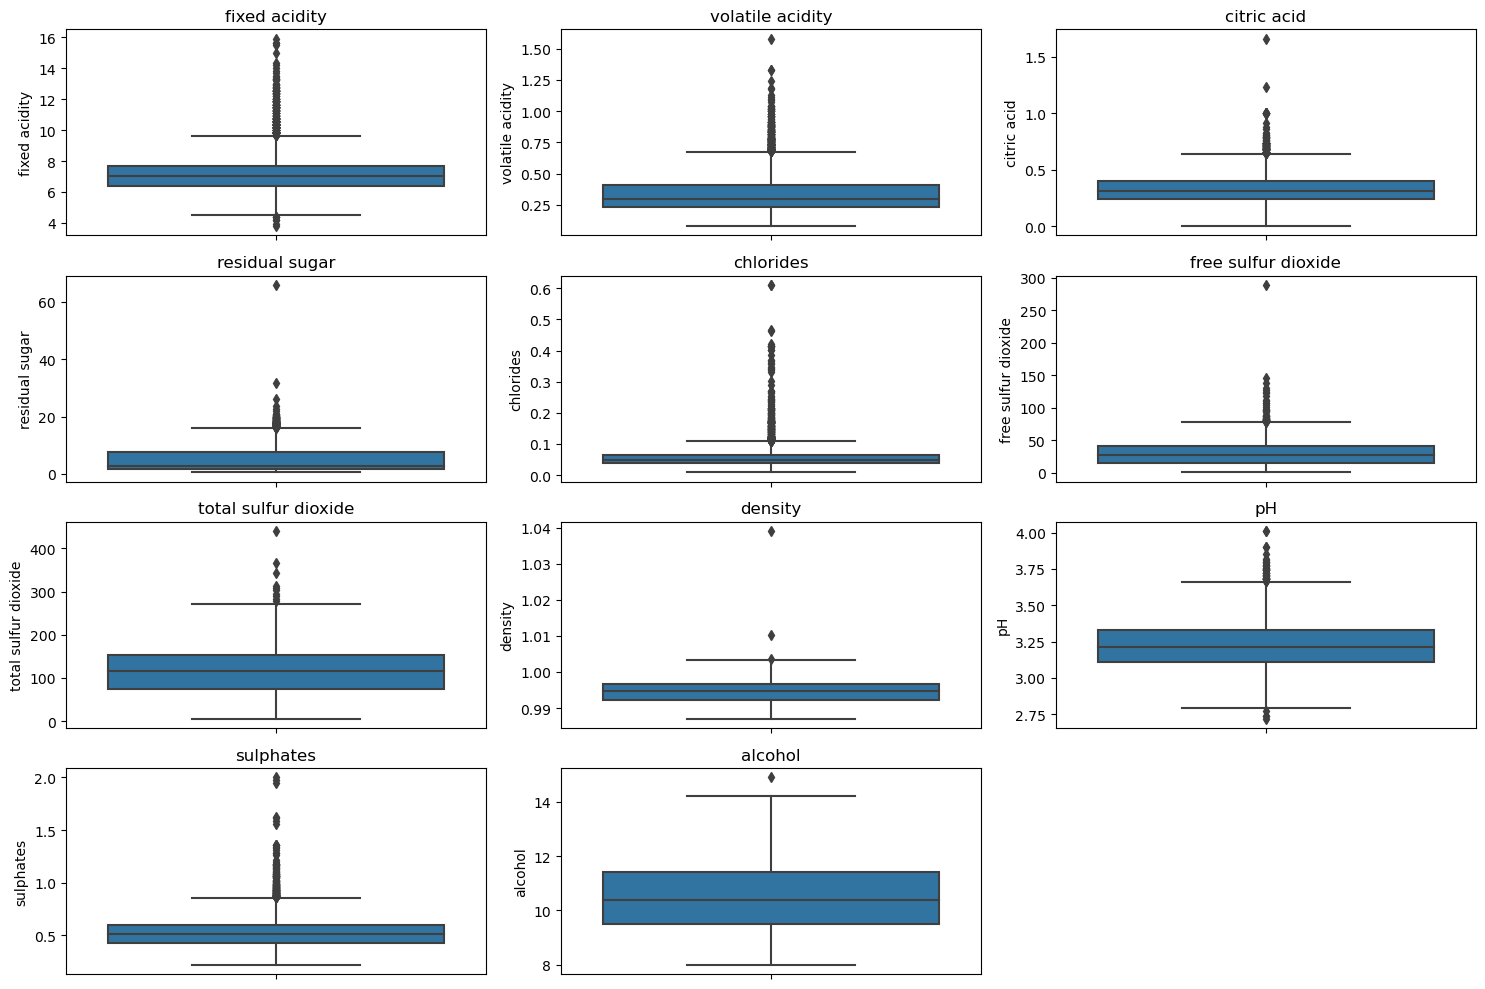

In [14]:
# Setting up the plot
plt.figure(figsize=(15, 10))

# Creating a boxplot for each feature
for i, feature in enumerate(wine.columns[:-1], 1):  # Excluding 'quality' which is categorical
    plt.subplot(4, 3, i)
    sns.boxplot(y = wine[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

#### Box Plot Interpretations:

1. Fixed Acidity: The majority of the data lies between approximately 6 and 8. There are some outliers above 10.

2. Volatile Acidity: Most values are between 0.2 and 0.5. There are outliers above 1.2.

3. Citric Acid: Most values lie between 0.1 and 0.5. Outliers are present above 1.0.

4. Residual Sugar: Most values are between 1.5 and 2.5. There are significant outliers above 10.

5. Chlorides: Most values are concentrated between 0.04 and 0.1. Outliers are seen above 0.2.

6. Free Sulfur Dioxide: Most values lie between 10 and 40. There are outliers above 70.

7. Total Sulfur Dioxide: The bulk of the data ranges between 75 and 150. Outliers extend above 250.

8. Density Most values are tightly packed between 0.99 and 1.00. Some outliers are present above 1.005.

9. pH: The majority of values are between 3.0 and 3.5. Outliers extend below 2.75 and above 3.75.

10. Sulphates: Most values lie between 0.5 and 0.8. Outliers are above 1.5.

11. Alcohol: The majority of values are between 9 and 11. Outliers extend above 13.

**Conclusion:** The presence of outliers in most features indicates variability in wine production methods and ingredients. While some features like alcohol and density show tight control and consistency, others like citric acid and chlorides exhibit significant variation, which could be critical for certain types of wine.

### Correlation Analysis: To identify relationships between the features and the quality.
In order for me to understnad how different features relate to wine quality and to each other, i decided to plot a correlation matrix using a heatmap to visually inspect the relationships between these features. Identifying these relationships will help me in my subsequent analysis like feature selection because not all features might be relevant.

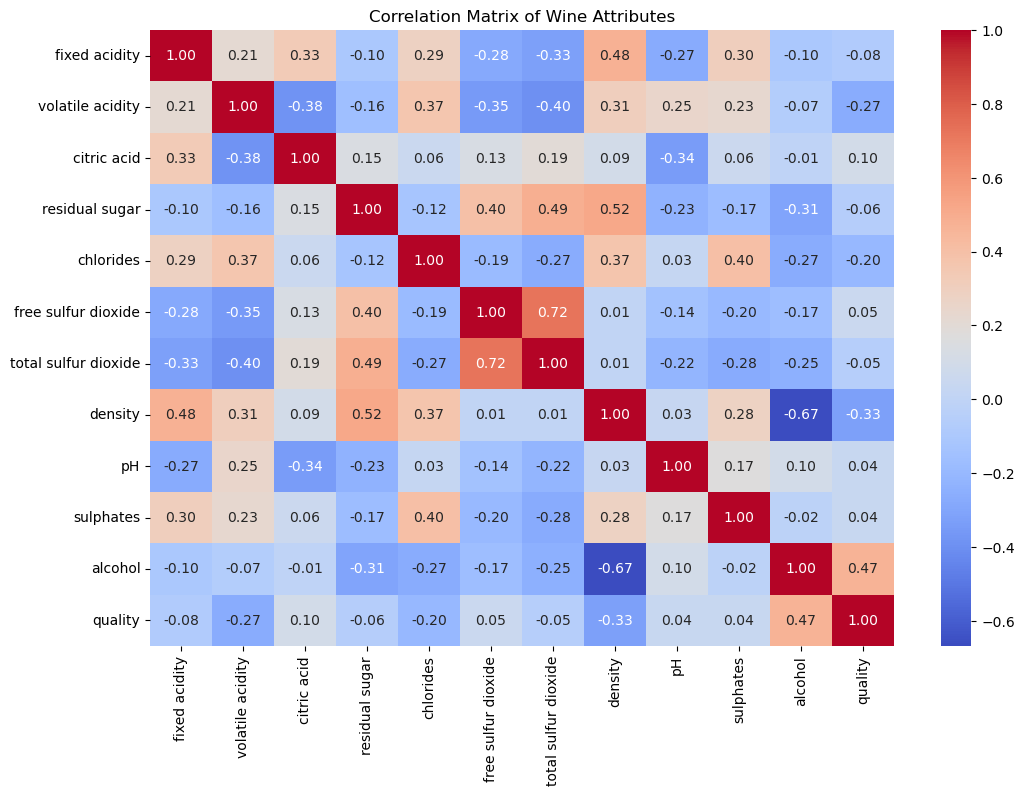

In [15]:
# Correlation matrix
correlation_matrix = wine.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

The heatmap above provides a clear visualization of the correlations between the variables in the wine dataset:
 The values range from -1 to 1, where:
- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

### Observations in relation to Wine Quality:

- Alcohol (0.47) : The strongest positive correlation with wine quality among all features. Higher alcohol content tends to be associated with higher quality wines. This makes sense as higher alcohol levels can enhance the sensory qualities of wine.

- Density (-0.33): has negative correlation with wine quality which indicates that higher density is associated with lower quality wine. Lower density wines might be perceived as more refined and better balanced, which could contribute to higher quality ratings. 

- Volatile Acidity (-0.27): negative correlation with wine quality which indicates that higher volatile acidity is associated with lower quality wine that implies a higher volatile acidity can lead to undesirable flavors and aromas, contributing to lower quality.

- Sulphates (0.04): Very weak correlation with wine quality. this Sulphates are used for preservation and can affect taste slightly, but their impact on perceived quality is minimal.

- Chlorides (-0.20): a negative  correlation indicates that higher chloride levels are associated with lower quality wines. Higher chloride content can give wine an unpleasant salty taste, leading to lower quality ratings.

- Citric Acid (0.10): Slight positive correlation with wine quality. Citric acid can add freshness to the wine, which might be perceived positively.

- Residual Sugar (-0.06): Very weak negative correlation with wine quality. Wines with very high residual sugar might be less desirable unless they are intended to be sweet wines.

- Fixed Acidity (-0.08): Weak negative correlation with wine quality. Fixed acidity affects the tartness of wine, and its impact on quality might be more nuanced depending on balance with other components.

- Free Sulfur Dioxide (0.06) and Total Sulfur Dioxide (-0.05): a very weak correlation can be as a result of almost no correlation with wine quality. which implication sulfur dioxide is used to preserve wine, and its presence within acceptable limits is unlikely to impact quality perception significantly.

- pH (0.04): Very weak correlation with wine quality. The pH level, which indicates the acidity/basicity of the wine, has minimal direct impact on the perceived quality.

### Summary:

- Focusing on Alcohol Content: Given its strong positive correlation with wine quality, alcohol content is a key feature in predicting wine quality. Ensuring optimal alcohol levels can significantly enhance wine quality.
- Managing Volatile Acidity and Density: These features have notable negative correlations with quality, indicating that controlling these factors can improve wine quality. Lower volatile acidity and density are desirable.
- Minor Impact of Other Features: While features like sulphates, chlorides, citric acid, and residual sugar have weaker correlations, they still play a role in the overall quality and should not be neglected.

## Step 3: Features Selection
To determine which features are most relevant in predicting wine quality.
For this stage, I will be using the above correlation information along with `ANOVA F-value method` to identify the most relevant features for predicting wine quality. 

In [16]:
# Preparing the features and target variable
X_variables = wine.drop('quality', axis=1)
y_variable = wine['quality']

# Applying SelectKBest with the ANOVA F-value method to select the top features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_variables, y_variable)

# Getting the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X_variables.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

feature_scores

,Feature,Score
10,alcohol,307.977876
7,density,130.251647
1,volatile acidity,80.765877
4,chlorides,43.272754
5,free sulfur dioxide,13.204516
3,residual sugar,10.309397
2,citric acid,9.502731
6,total sulfur dioxide,8.128644
0,fixed acidity,7.147666
9,sulphates,3.567827


#### Feature Selection Results
Based on the ANOVA F-values from the SelectKBest method, the features are ranked by their importance in predicting wine quality:

- Alcohol (307.98): The most significant predictor of wine quality in this dataset.
- Density (130.25): Also highly influential, likely due to its relation to other physical properties of wine.
- Volatile Acidity (80.77): A strong negative influencer, consistent with our correlation findings where lower acidity correlates with higher quality.
- Chlorides (43.27): Affects taste and preservation, hence its relevance.
- Free Sulfur Dioxide (13.20): Important in preventing oxidation and maintaining freshness.
- Citric Acid, Residual Sugar, Fixed Acidity, Total Sulfur Dioxide, Sulphates, and pH: These features have lesser but still notable influence.
- Sulphates, and pH: have the least significant in ranking with approximately 3.57 and 3.45 respectively.

**`I will be making use of alcohol, density, volatile acidity, chlorides, and residual sugar in the next stage since these features were highlighted by the ANOVA F-tests  are in line with my correlation result as significantly influencing wine quality.`**

In [17]:
# creating new variable name for the feature specified by ANOVA F-test as significantly infliencing the quality of wine.
selected_features = wine[['alcohol', 'density', 'volatile acidity', 'chlorides', 'residual sugar','quality']]
selected_features

,alcohol,density,volatile acidity,chlorides,residual sugar,quality
0,8.8,1.00100,0.270,0.045,20.7,6
1,9.5,0.99400,0.300,0.049,1.6,6
2,10.1,0.99510,0.280,0.050,6.9,6
3,9.9,0.99560,0.230,0.058,8.5,6
6,9.6,0.99490,0.320,0.045,7.0,6
...,...,...,...,...,...,...
6491,9.5,0.99651,0.620,0.068,1.9,6
6492,10.5,0.99490,0.600,0.090,2.0,5
6493,11.2,0.99512,0.550,0.062,2.2,6
6495,10.2,0.99547,0.645,0.075,2.0,5


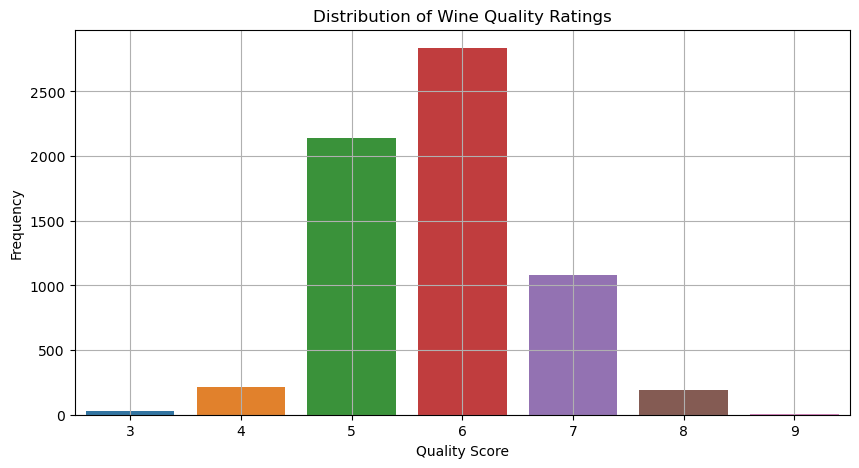

In [18]:
# plot wine quality rating
# Distribution of the quality variable
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=merged_wine)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Interpretation of the Wine Quality Distribution

The bar plot represents the distribution of wine quality ratings in the wine dataset.

The quality variable is mostly concentrated around scores of 5 and 6, indicating a skew towards average wines. Scores of 3 and 9 are rare, these could be the outliers (excellent or poor wines).

Also, the distribution shows a clear class imbalance, with most wines rated around 5 and 6. This imbalance needs to be addressed for predictive modelling to ensure the model doesn't become biased towards the majority classes.


#### Plotting the selected features against wine quality.

In [19]:
# plotting box plot for the alcohol quality level
fig = px.box(selected_features, x='alcohol', color='quality', points='outliers')
fig.update_layout(
    title='alcohol box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

Interpretation: The above box plot provides a clear visualization of how alcohol content varies with wine quality, reinforcing the importance of alcohol as a key feature in wine quality assessment and prediction.

There is a clear positive correlation between alcohol content and wine quality. A higher quality wines generally have higher alcohol content. Lower quality wines (3, 4, 5) show a wider range of alcohol content, indicating less consistency in their production. Higher quality wines (7, 8, 9) have a more consistent and higher range of alcohol content.

Winemakers aiming for higher quality wines should consider targeting higher and more consistent alcohol content in their production processes.

In [20]:
# Filtering the dataframe so that it does not crash the browser
quality_features = selected_features.head(1000)
# ploting density against quality
fig = px.box(quality_features, x='quality', y='density', points='outliers')
fig.update_layout(
    title='quality, density (first 1000 rows) box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

This box plot provides a clear visualization of how density varies with wine quality, reinforcing the importance of density as a key feature in wine quality assessment and prediction.

Summary of the box plot above:
Negative Correlation: There is a clear negative correlation between density and wine quality that's a higher quality wines tend to have lower density.
Consistent Density in Higher Quality: Higher quality wines like 7, 8 and 9 show more consistency in density, with lower median values.
Wider Range in Lower Qualities: Lower quality wines like 3, 4, and 5 show a wider range of density values, indicating more variability in production.

conclusion
Feature Importance: Density is an important feature for predicting wine quality. Models should account for the trend that higher quality wines generally have lower density.

Winemakers that is aiming to produce higher quality wines should monitor and control the density during production.

In [21]:
# plot volatile acidity box plot
fig = px.box(selected_features, x='volatile acidity', color='quality', points='outliers')
fig.update_layout(
    title='volatile acidity box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")


#### Interpretation of the Volatile Acidity Box Plot by Wine Quality

The box plot visualizes the distribution of volatile acidity across different wine quality ratings. 
Summary
There is a clear negative correlation between volatile acidity and wine quality. That's higher quality wines tend to have lower volatile acidity. The higher quality wines in 7, 8, and 9 show more consistency and lower values of volatile acidity while lower quality wines (3, 4, 5) show a wider range and higher values of volatile acidity, indicating more variability and lower quality.
Therefore,  Volatile acidity is a significant feature for predicting wine quality.

In [22]:
# plotting chlorides vs quality
fig = px.box(selected_features, x='chlorides', color='quality', points='outliers')
fig.update_layout(
    title='chlorides box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

### Interpretation of the Chlorides Box Plot by Wine Quality

The box plot visualizes the distribution of chloride content across different wine quality ratings.

- Negative Correlation: There is a clear negative correlation between chloride content and wine quality. Higher quality wines tend to have lower chloride content.
- Consistent Chloride Content in Higher Quality: Higher quality wines (7, 8, 9) show more consistency and lower values of chloride content.
- Wider Range in Lower Qualities: Lower quality wines (3, 4, 5) show a wider range and higher values of chloride content, indicating more variability and lower quality.

- Feature Importance: Chloride content is a significant feature for predicting wine quality. Models should give this feature considerable importance.

- Quality Control: Winemakers aiming for higher quality wines should monitor and control chloride content during production, aiming for lower levels.

In [23]:
# residual sugar plot
fig = px.box(selected_features, x='residual sugar', color='quality', points='outliers')
fig.update_layout(
    title='residiual sugar box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

### Interpretation of the Residual Sugar Box Plot by Wine Quality

The box plot visualizes the distribution of residual sugar across different wine quality ratings. 

- There is a general negative correlation between residual sugar content and wine quality. Higher quality wines tend to have lower residual sugar content.
- The higher quality wines (7, 8, 9) show more consistency and lower values of residual sugar content.
- The Lower quality wines (3, 4, 5) show a wider range and higher values of residual sugar content, indicating more variability and lower quality.

Residual sugar is a significant feature for predicting wine quality. Models should give this feature considerable importance.

Winemakers aiming for higher quality wines should monitor and control residual sugar content during production, aiming for lower levels.

In [24]:
# download as a csv file
selected_features.to_csv('Downloads/selected features data.csv', index=False)

This cvs file will be used for the 